## CS867: Computer Vision


> Image Classification Using CNN 



## Author <a name="data"></a>

<b>Name</b>: Waqas Rauf Khattak <br>
<b>CMS_ID</b>: 318256 <br>
<b>School</b>: School of Electrical Engineering anf Computer Science (SEECS) <br>
<b>University</b>: National University of Science and Technology (NUST) <br>
<b>Task</b>: : 315 Birds Species Classification using ResNet50

In [ ]:
# necessary imports

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
from keras.optimizers import gradient_descent_v2 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from google.colab import drive
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from keras.utils.data_utils import Sequence
import sys
from PIL import *
from keras import optimizers
from tensorflow.keras import optimizers
import tensorflow.keras as keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Mounting google drive

drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/CV Assignments/Assignment 02/Assignment_02_Dataset/'
!ls

In [ ]:
%cd '/content/gdrive/My Drive/CV Assignments/Assignment 02/Assignment_02_Dataset/315BirdsSpecies'
!ls

In [ ]:
IMAGE_SIZE = [150, 150]

model = ResNet50(weights='imagenet', include_top=False)

result = model.output
result = GlobalAveragePooling2D()(result)
# add a fully-connected layer
result = Dense(512, activation='relu')(result)
# and a fully connected output/classification layer
predictions = Dense(2, activation='sigmoid')(result)

inception_transfer = Model(inputs=model.input, outputs=predictions)

inception_transfer.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
# view the structure of the model
model.summary()
model.compile(
  loss='categorical_crossentropy',
  optimizer= sgd,
  metrics=['accuracy']
)


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')
valid_generator = test_datagen.flow_from_directory(
    'valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
r = inception_transfer.fit_generator(generator=train_generator,
                    validation_data=valid_generator,
                    epochs = 20,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(valid_generator))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
164/164 [==============================] - 171s 1s/step - loss: 0.0922 - accuracy: 0.9675 - val_loss: 1.2785 - val_accuracy: 0.6266
Epoch 2/20
164/164 [==============================] - 171s 1s/step - loss: 0.0801 - accuracy: 0.9744 - val_loss: 0.8330 - val_accuracy: 0.6683
Epoch 3/20
164/164 [==============================] - 171s 1s/step - loss: 0.0758 - accuracy: 0.9731 - val_loss: 0.3995 - val_accuracy: 0.8173
Epoch 4/20
164/164 [==============================] - 171s 1s/step - loss: 0.0744 - accuracy: 0.9746 - val_loss: 0.2795 - val_accuracy: 0.8974
Epoch 5/20
164/164 [==============================] - 170s 1s/step - loss: 0.0666 - accuracy: 0.9757 - val_loss: 0.3071 - val_accuracy: 0.8942
Epoch 6/20
164/164 [==============================] - 169s 1s/step - loss: 0.0646 - accuracy: 0.9773 - val_loss: 0.4196 - val_accuracy: 0.8606
Epoch 7/20
164/164 [==============================] - 170s 1s/step - loss: 0.0656 - accuracy: 0.9759 - val_loss: 0.2965 - val_accuracy: 0.9022

In [ ]:
# Save the model's trained weights

model.save_weights('resnet50_trained_wts.h5')
!cp "/content/resnet50_trained_wts.h5" "/content/gdrive/My Drive/"

In [ ]:
# Evaluating Model

score = inception_transfer.evaluate_generator(test_generator)
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test Loss =  0.18433117866516113
Test Accuracy =  0.9294871687889099


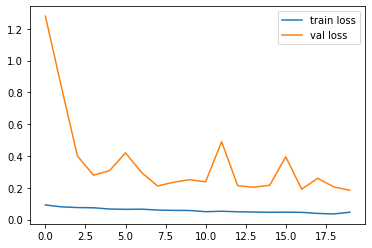

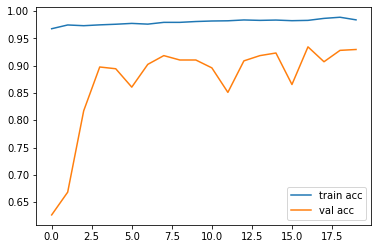

<Figure size 432x288 with 0 Axes>

In [ ]:
#LEARNING CURVE
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Making prediction

pred_datagen = ImageDataGenerator(rescale = 1./255)
prediction_set = pred_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (150, 150),
                                            batch_size = 64,
                                            shuffle = False,
                                            class_mode = 'categorical')

pred_original_labels = prediction_set.classes

pred_label = inception_transfer.predict_generator(prediction_set)


In [ ]:
# Plotting the confusion matrix

y_pred = np.argmax(pred_label, axis=1)
print('Confusion Matrix')
print(confusion_matrix(prediction_set.classes, y_pred))

In [ ]:
# Plotting the confusion matrix

y_pred = np.argmax(pred_label, axis=1)
class_labels = list(test_generator.class_indices.keys()) 
report = metrics.classification_report(pred_original_labels, y_pred, target_names=class_labels)
print(report) 

print('Confusion Matrix')
CM = confusion_matrix(test_generator.classes, y_pred)
print(CM)

In [ ]:
labels = ['Normal','Pneumonia'] # default sorting of classes is aplanumeric
sns.heatmap(CM, xticklabels=labels, yticklabels=labels,
            annot=True, fmt='d', cmap="YlGnBu")

In [ ]:
# separate the classifier layer names in a list
classifier_layer_names = ['block5_pool', 'flatten', 'fc1', 'fc2', 
                          'predictions']

In [ ]:
# get the last conv layer
last_conv_layer = model.get_layer('block5_conv3')

# new model that outputs last conv layer's feature map
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

In [ ]:
classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

In [ ]:
# Then, we compute the gradient of the top predicted class for our input image
# with respect to the activations of the last conv layer

with tf.GradientTape() as tape:
    # Compute activations of the last conv layer and make the tape watch it
    last_conv_layer_output = last_conv_layer_model(img)
    tape.watch(last_conv_layer_output)
    # Compute class predictions
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]

In [ ]:
# This is the gradient of the top predicted class with regard to
# the output feature map of the last conv layer
grads = tape.gradient(top_class_channel, last_conv_layer_output)

# This is a vector where each entry is the mean intensity of the gradient
# over a specific feature map channel
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the top predicted class
last_conv_layer_output = last_conv_layer_output.numpy()[0]
pooled_grads = pooled_grads.numpy()
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(last_conv_layer_output, axis=-1)

# For visualization purpose, we will also normalize the heatmap between 0 & 1
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

In [ ]:
# print top class prediction
print(decode_predictions(model.predict(img), top=1)[0])

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
# Testing Model

classes = test_generator.labels
images = test_generator.next()
org_label = test_generator.classes
for i in range(20,30):
    plt.imshow(images[0][i])
    plt.show()
    print("Original Label : ",classes[org_label[i]])
    print("Model Predicted Label : ",classes[y_pred[i]])